In [1]:
import numpy as np
import scipy 
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from collections import Counter

In [2]:
wave_emit = 1215.67 # Angstroms

In [3]:
#load the file from MIDAS here
#wavelength in angstroms
#doppler param in km/s
#column density is in log - change it to lineat using 10**log
#calculate the redshifts corresponding to wavelengths
#arr = [1, 2, 2, 3, 3, 3, 4]
#counts = Counter(arr)
#counts
#counts, bins,_ = plt.hist(gauss2,bins = 30, density=True, label='')


In [4]:
# Generate random data for the histogram
#data = np.random.randn(1000)

# Plotting a basic histogram
#binwidth1 = 0.5
#bins1 = np.arange(min(data) , max(data) + binwidth1 , binwidth1)
#plt.hist(data, bins1, color='skyblue', edgecolor='black')

In [5]:
#np.quantile
#Given a sample a from an underlying distribution, 
#quantile provides a nonparametric estimate of the inverse cumulative distribution function.

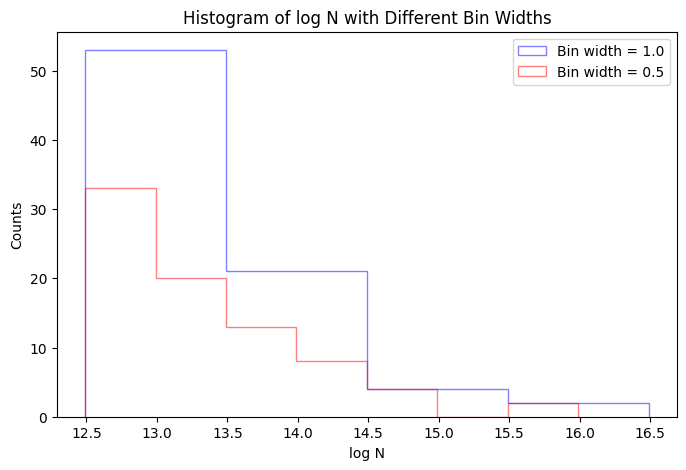

array([12.49, 12.99, 13.49, 13.99, 14.49, 14.99, 15.49, 15.99])

In [6]:
file = np.loadtxt("fit_usmspecn_all.txt",usecols=(0,2) ,unpack=True)
log_N = file[1]
wave_obs = file[0]
red = wave_obs/1215.67 - 1
del_z = max(red) - min(red)
binw1 = 1.0
binw2 = 0.5
# Set bin width to 0.2
binw3 = 0.2
bins1 = np.arange( min(log_N) , max(log_N) + binw1, binw1)
bins2 = np.arange( min(log_N) , max(log_N) + binw2, binw2)
bins3 = np.arange(min(log_N), max(log_N) + binw3, binw3)

# Plot
plt.figure(figsize=(8, 5))
plt.hist(log_N, bins=bins1, histtype= 'step', color='b', alpha=0.5, label=f'Bin width = {binw1}')
plt.hist(log_N, bins=bins2,histtype='step' , color='r', alpha=0.5, label=f'Bin width = {binw2}')
plt.xlabel('log N')
plt.ylabel('Counts')
plt.legend()

plt.title('Histogram of log N with Different Bin Widths')
plt.show()
#np.hist return ciunts - normalize - then do plt.plot
bins2

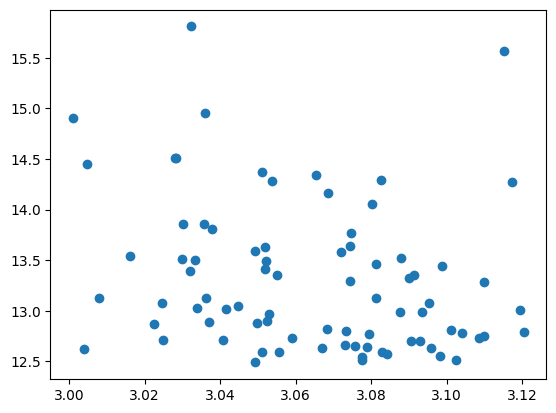

In [7]:
plt.scatter(red , log_N)

In [8]:
#def redshift_intervals(log_N, wave_obs, bins, lambda_emit):
 #   bin_centers = 0.5 * (bins[:-1] + bins[1:])
  #  z_ranges = []

   # for i in range(len(bins) - 1):
        # Find indices where log_N is in this bin
    #    mask = (log_N >= bins[i]) & (log_N < bins[i+1])
     #   wave_in_bin = wave_obs[mask]



   # return z_ranges
#z_info = redshift_intervals(log_N, wave_obs, bins1, wave_emit)

# Print some results
#for bin_center, z_min, z_max, delta_z in z_info:
 #   print(f"log N ≈ {bin_center:.2f}: z ∈ [{z_min:.3f}, {z_max:.3f}], redshift interval: {delta_z:.3f}")
    

In [9]:
#delta_z_list = [round(entry[3], 3) for entry in z_info]
#print(delta_z_list)

In [10]:
# Get redshift info: (bin_center, z_min, z_max, delta_z)
#z_info = redshift_intervals(log_N, wave_obs, bins1, wave_emit)

# Extract only the delta_z values (same length as counts1)
#delta_z_list = [round(entry[3], 3) for entry in z_info]

# Compute histogram
counts1, _ = np.histogram(log_N, bins1)
counts2, _ = np.histogram(log_N, bins2)
# Compute histogram
counts3, _ = np.histogram(log_N, bins3)


# Normalize each bin count by (bin width × Δz)

print(counts1)
print(counts2)
print(counts3)

[53 21  4  2]
[33 20 13  8  4  0  2]
[15 15 11  3  9  9  4  1  3  4  2  0  2  0  0  1  1]


In [11]:
col_dense = 10**log_N
col_dense
plt_ln_col_dense = np.log(col_dense)
plt_ln_col_dense

binw1 = 1.0
binw2 = 0.5
bins1 = np.arange( min(log_N) , max(log_N) + binw1, binw1)
bins2 = np.arange( min(log_N) , max(log_N) + binw2, binw2) 

In [12]:
norm_count1 = counts1 / (binw1 * np.log(10)* del_z)
norm_count1 = np.append(norm_count1, 0)
norm_count2 = counts2 / (binw2 * np.log(10)* del_z)
norm_count2 = np.append(norm_count2, 0)

print(norm_count1)
print(norm_count2)

[192.61936366  76.32087994  14.53731047   7.26865523   0.        ]
[239.86562267 145.37310465  94.49251802  58.14924186  29.07462093
   0.          14.53731047   0.        ]


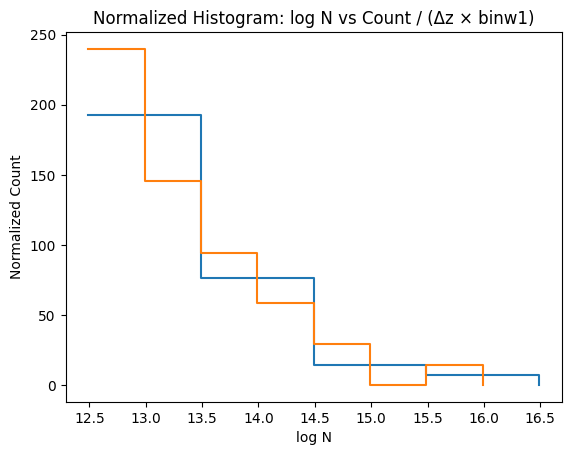

In [13]:
#bin_centers = 0.5 * (bins1[:-1] + bins1[1:])
#plt.plot(bin_centers, normalized_counts, drawstyle='steps-mid', color='green', label='Normalized by binw1 and Δz')
plt.step(bins1 , norm_count1, where='post')
plt.step(bins2 , norm_count2, where='post')

plt.xlabel('log N')
plt.ylabel('Normalized Count')
plt.title('Normalized Histogram: log N vs Count / (Δz × binw1)')
plt.show()

In [14]:
#convert log to ln so thar bin edges on lower side are defined ,#to ensure that the limits is between 0-250, we divide by ln 10, (equTION12)
# for equal count binning, if two values are blended or have same exact column densities
#how will you separate them?
#we do so by CHANGING THE COLUMN DENSITIES
#we do that by adding a small offset or random gaussian noise
#to ensure that the limits is between 0-250, we divide by ln 10

In [15]:
# Add a dummy bin at the beginning
bins1 = np.insert(bins1, 0, bins1[0] - 0.01)
norm_count1 = np.insert(norm_count1, 0, 0)

bins2 = np.insert(bins2, 0, bins2[0] - 0.01)
norm_count2 = np.insert(norm_count2, 0, 0)
# Normalize (do NOT append 0 for fitting)
norm_count3 = counts3 / (binw3 * np.log(10) * del_z)


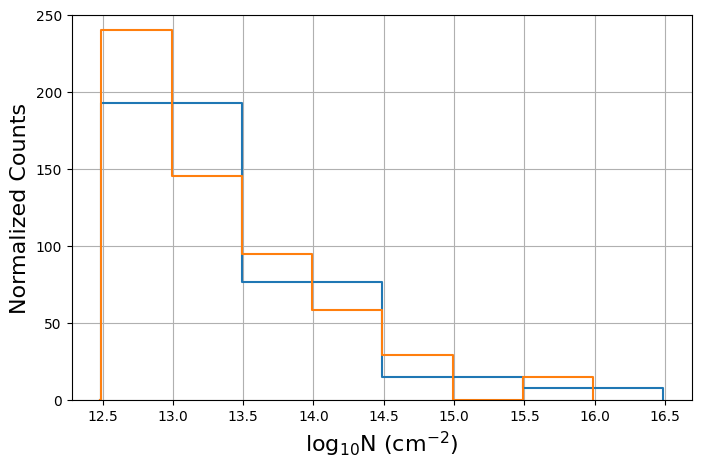

In [16]:
#bin_centers = 0.5 * (bins1[:-1] + bins1[1:])
#plt.plot(bin_centers, normalized_counts, drawstyle='steps-mid', color='green', label='Normalized by binw1 and Δz')
plt.figure(figsize=(8,5))
plt.step(bins1 , norm_count1, where='post')
plt.step(bins2 , norm_count2, where='post')
plt.ylim(0,250)
plt.xlabel('log$_{10}$N (cm$^{-2}$)' , fontsize =16)
plt.ylabel('Normalized Counts', fontsize =16)
plt.grid(True)
plt.savefig("norm_counts.png", dpi=300, bbox_inches='tight')

plt.show()

----------------------------------------------------------------------------------------------------------------------------------------------

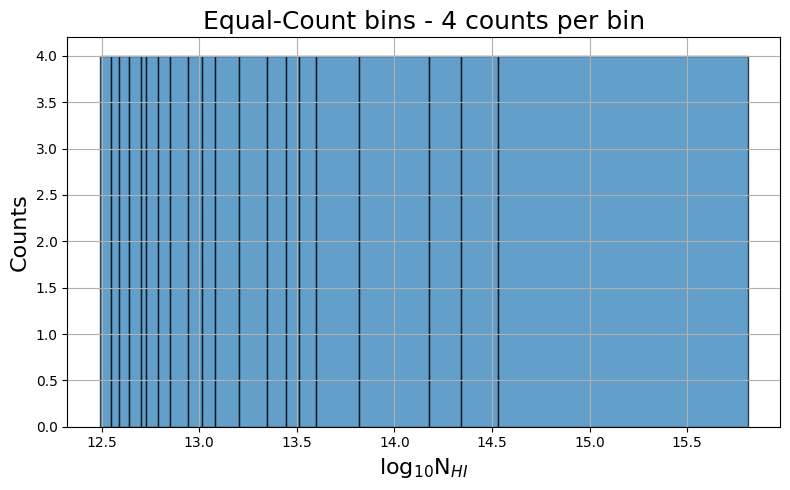

In [17]:
jittered_log_N = log_N + np.random.normal(loc=0.0, scale=1e-4, size=log_N.shape)
jittered_log_N = np.sort(jittered_log_N)
num_bins = 20
quantiles = np.linspace(0, 1, num_bins + 1)
bin_edges = np.quantile(jittered_log_N, quantiles)

# Now these bins will split the data more evenly
plt.figure(figsize=(8,5))

plt.hist(jittered_log_N, bin_edges, edgecolor='black', alpha=0.7)

plt.xlabel('log$_{10}$N$_{HI}$' , fontsize = 16)
plt.ylabel('Counts' , fontsize = 16)
plt.title('Equal-Count bins - 4 counts per bin', fontsize = 18)
plt.grid(True)
plt.tight_layout()
plt.show()

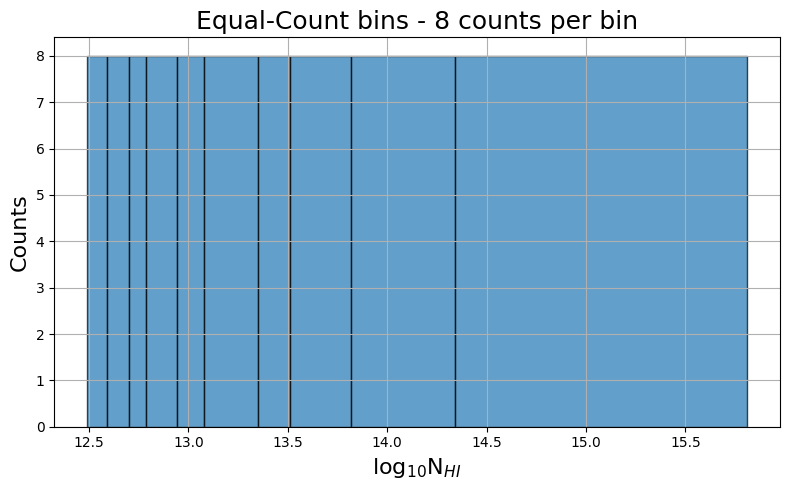

[12.49007996 12.59002517 12.70003112 12.78704235 12.94198004 13.07999507
 13.35006116 13.51290942 13.81996289 14.34307622 15.81006314]


In [18]:
jittered_log_N = log_N + np.random.normal(loc=0.0, scale=1e-4, size=log_N.shape)
jittered_log_N = np.sort(jittered_log_N)
num_bins = 10
quantiles = np.linspace(0, 1, num_bins + 1)
bin_edges = np.quantile(jittered_log_N, quantiles)

# Now these bins will split the data more evenly
plt.figure(figsize=(8,5))

plt.hist(jittered_log_N, bin_edges, edgecolor='black', alpha=0.7)

plt.xlabel('log$_{10}$N$_{HI}$' , fontsize = 16)
plt.ylabel('Counts' , fontsize = 16)
plt.title('Equal-Count bins - 8 counts per bin', fontsize = 18)
plt.grid(True)
plt.tight_layout()
plt.show()
print(bin_edges)

In [19]:
#lval@usm.lmu.de
norm_count1

array([  0.        , 192.61936366,  76.32087994,  14.53731047,
         7.26865523,   0.        ])

In [20]:
bin_centers1 = 0.5 * (bins1[:-1] + bins1[1:])
N_vals1 = 10**bin_centers1  # Convert log10(N) to N
f_N1 = norm_count1[:-1]     # Remove extra padded 0

log_N_vals = np.log10(N_vals1)
log_f_vals = np.log10(f_N1)
def linear_model(log_N, log_A, beta):
    return log_A + beta * log_N
from scipy.optimize import curve_fit

# Remove zeros to avoid log10 issues
mask = f_N1 > 0
popt, pcov = curve_fit(linear_model, log_N_vals[mask], log_f_vals[mask])
log_A_fit, beta_fit = popt
A_fit = 10**log_A_fit

# Errors (1-sigma uncertainties)
perr = np.sqrt(np.diag(pcov))
err_log_A, err_beta = perr
err_A = A_fit * np.log(10) * err_log_A  # Convert error from log_A to A


C:\Users\jebraan jamil\AppData\Local\Temp\ipykernel_19468\2305965022.py:6: RuntimeWarning: divide by zero encountered in log10
  log_f_vals = np.log10(f_N1)


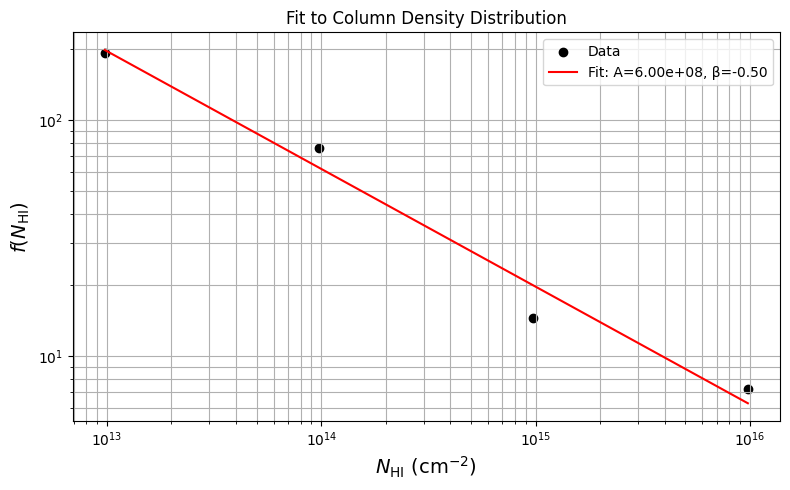

In [21]:
plt.figure(figsize=(8, 5))
plt.scatter(N_vals1[mask], f_N1[mask], color='black', label='Data')
plt.plot(N_vals1[mask], A_fit * N_vals1[mask]**beta_fit, color='red', label=f'Fit: A={A_fit:.2e}, β={beta_fit:.2f}')
plt.xscale('log')
plt.yscale('log')
plt.xlabel(r'$N_{\mathrm{HI}}\ (\mathrm{cm}^{-2})$', fontsize=14)
plt.ylabel(r'$f(N_{\mathrm{HI}})$', fontsize=14)
plt.legend()
plt.grid(True, which='both')
plt.title("Fit to Column Density Distribution")
plt.tight_layout()
plt.show()


### BIN WIDHT = 1.0 

### Fitting 

In [22]:
#we will define the model in linear and perfrom the fitting in linear, and then plot using plt.loglog
#bin centers -  values of log_10N - convert to linear
log_10_N_center_1 = 0.5 * (bins1[:-1] + bins1[1:])
mask > 0
log10_count1 = np.log10(norm_count1[:-1][mask]) #counts werent in log

def log_model(log_N, log_A, beta):
    return log_A + beta * log_N
popt1, pcov1 = curve_fit(log_model , log_10_N_center_1[mask] , log10_count1) #mask for y already done

log_A_fit1, beta_fit1 = popt1
A_fit1 = 10**(log_A_fit1)
print(f'Best fit A for BW 1.0={log_A_fit1}')
print(f'Best fit beta for BW 1.0 = {beta_fit1:.2f}')
# Errors (1-sigma uncertainties)
perr1 = np.sqrt(np.diag(pcov))
err_log_A1, err_beta1 = perr1
err_A1 = A_fit1 * np.log(10) * err_log_A1  # Convert error from log_A to A
print(f'error in A for BW 1.0 = {err_log_A1:.2f}')
print(f'error in beta for BW 1.0 = {err_beta1}')


Best fit A for BW 1.0=8.778180955618486
Best fit beta for BW 1.0 = -0.50
error in A for BW 1.0 = 0.79
error in beta for BW 1.0 = 0.05452260423895466


### BIN WIDTH = 0.5

In [23]:
# For fitting, use the original normalized counts (without appended 0)
norm_count2_fit = counts2 / (binw2 * np.log(10) * del_z)  # Shape: (8,)
log_10_N_center_2 = 0.5 * (bins2[:-1] + bins2[1:])

# Append 0 only for plotting
norm_count2_plot = np.append(norm_count2_fit, 0)
mask2 = norm_count2_fit > 0  # Now matches log_10_N_center_2's length (8)
# Compute histogram
counts2, _ = np.histogram(log_N, bins2)

# Normalize WITHOUT appending 0 for fitting
norm_count2_fit = counts2 / (binw2 * np.log(10) * del_z)

# Create mask from unmodified data
mask2 = norm_count2_fit > 0

# Filter valid data
log10_count2 = np.log10(norm_count2_fit[mask2])

# Perform fit
popt2, pcov2 = curve_fit(log_model, log_10_N_center_2[mask2], log10_count2)
log_A_fit2, beta_fit2 = popt2
A_fit2 = 10**(log_A_fit2)
print(f'Best fit A for BW 0.5={log_A_fit2}')
print(f'Best fit beta for BW 0.5 = {beta_fit2:.2f}')
# Errors (1-sigma uncertainties)
perr2 = np.sqrt(np.diag(pcov))
err_log_A2, err_beta2 = perr2
err_A2 = A_fit2 * np.log(10) * err_log_A2  # Convert error from log_A to A
print(f'error in A for BW 0.5 = {err_log_A2:.2f}')
print(f'error in beta for BW 0.5  = {err_beta2}')

Best fit A for BW 0.5=7.672378243432224
Best fit beta for BW 0.5 = -0.42
error in A for BW 0.5 = 0.79
error in beta for BW 0.5  = 0.05452260423895466


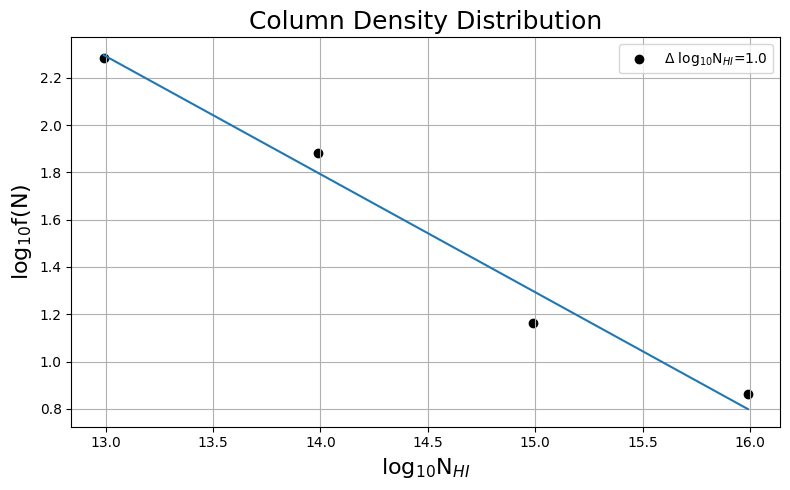

In [34]:
plt.figure(figsize=(8, 5))
plt.scatter(log_10_N_center_1[mask], log10_count1, color='black', label='$\Delta$ log$_{10}$N$_{HI}$=1.0')

plt.plot(log_10_N_center_1[mask] , log_model(log_10_N_center_1[mask] , log_A_fit1 , beta_fit1) )

plt.xlabel(r'log$_{10}$N$_{HI}$', fontsize=16)
plt.ylabel(r'log$_{10}$f(N)', fontsize=16)
plt.legend()
plt.grid(True, which='both')
plt.title("Column Density Distribution", fontsize = 18)
plt.tight_layout()
plt.show()

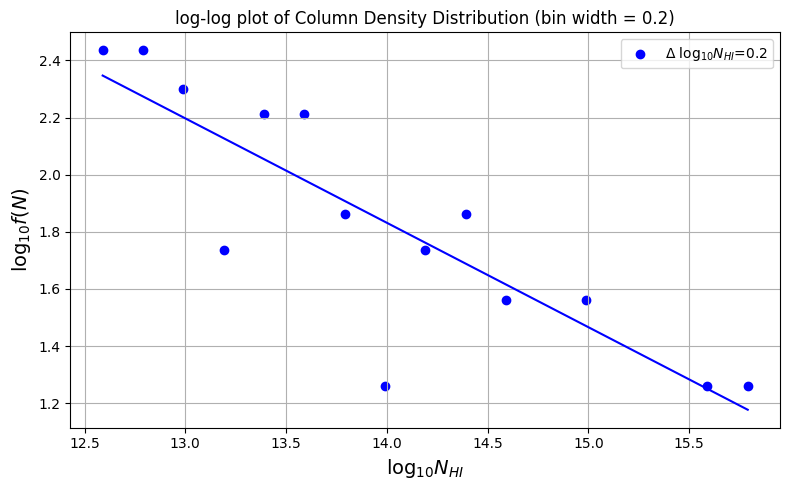

Best fit A for BW 0.2 = 6.95e+00 ± 9.12e-01
Best fit beta for BW 0.2 = -0.37 ± 0.07


In [25]:
log_10_N_center_3 = 0.5 * (bins3[:-1] + bins3[1:])

# Mask for nonzero counts
mask3 = norm_count3 > 0
log10_count3 = np.log10(norm_count3[mask3])

# Power-law fit in log-log space
def log_model(log_N, log_A, beta):
    return log_A + beta * log_N

popt3, pcov3 = curve_fit(log_model, log_10_N_center_3[mask3], log10_count3)
log_A_fit3, beta_fit3 = popt3
A_fit3 = 10**(log_A_fit3)
perr3 = np.sqrt(np.diag(pcov3))
err_log_A3, err_beta3 = perr3
err_A3 = A_fit3 * np.log(10) * err_log_A3

# Plot
plt.figure(figsize=(8
                , 5))
plt.scatter(log_10_N_center_3[mask3], log10_count3, color='blue', label=r'$\Delta$ log$_{10}N_{HI}$=0.2')
plt.plot(log_10_N_center_3[mask3], log_model(log_10_N_center_3[mask3], log_A_fit3, beta_fit3), color='blue')

plt.xlabel(r'log$_{10}N_{HI}$', fontsize=14)
plt.ylabel(r'log$_{10}f(N)$', fontsize=14)
plt.legend()
plt.grid(True, which='both')
plt.title("log-log plot of Column Density Distribution (bin width = 0.2)")
plt.tight_layout()
plt.show()

print(f'Best fit A for BW 0.2 = {log_A_fit3:.2e} ± {err_log_A3:.2e}')
print(f'Best fit beta for BW 0.2 = {beta_fit3:.2f} ± {err_beta3:.2f}')


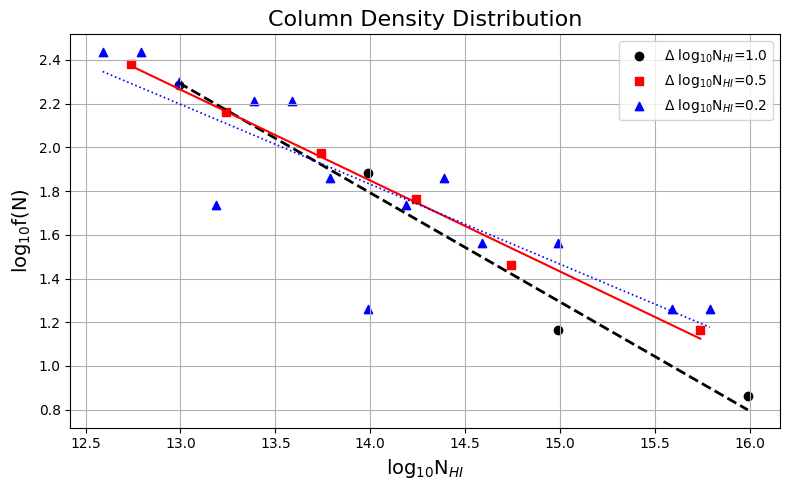


Bin Width 1.0 Results:
A = 6.00e+08 ± 1.09e+09
β = -0.50 ± 0.05

Bin Width 0.5 Results:
A = 4.70e+07 ± 8.58e+07
β = -0.42 ± 0.05

Bin Width 0.2 Results:
A = 8.90e+06 ± 1.87e+07
β = -0.37 ± 0.07


In [36]:
# Figure 1: Bin width 1.0
plt.figure(figsize=(8, 5))
plt.scatter(log_10_N_center_1[mask], log10_count1, color='black', 
            label=r'$\Delta$ log$_{10}$N$_{HI}$=1.0', marker='o')
plt.plot(log_10_N_center_1[mask], log_model(log_10_N_center_1[mask], log_A_fit1, beta_fit1), 
         'k--', lw=2)
plt.xlabel(r'log$_{10}$N$_{HI}$', fontsize=14)
plt.ylabel(r'log$_{10}$f(N)', fontsize=14)
plt.legend()
plt.grid(True)
plt.title("Column Density Distribution (Bin Width = 1.0)")
plt.tight_layout()


plt.scatter(log_10_N_center_2[mask2], log10_count2, color='red', 
            label=r'$\Delta$ log$_{10}$N$_{HI}$=0.5', marker='s')
plt.plot(log_10_N_center_2[mask2], log_model(log_10_N_center_2[mask2], log_A_fit2, beta_fit2), 
         'r-', lw=1.5)
plt.xlabel(r'log$_{10}$N$_{HI}$', fontsize=14)
plt.ylabel(r'log$_{10}$f(N)', fontsize=14)
plt.legend()
plt.grid(True)
plt.title("Column Density Distribution (Bin Width = 0.5)")
plt.tight_layout()

plt.scatter(log_10_N_center_3[mask3], log10_count3, color='blue', 
            label=r'$\Delta$ log$_{10}$N$_{HI}$=0.2', marker='^')
plt.plot(log_10_N_center_3[mask3], log_model(log_10_N_center_3[mask3], log_A_fit3, beta_fit3), 
         'b:', lw=1.2)
plt.xlabel(r'log$_{10}$N$_{HI}$', fontsize=14)
plt.ylabel(r'log$_{10}$f(N)', fontsize=14)
plt.legend()
plt.grid(True)
plt.title("Column Density Distribution", fontsize = 16)
plt.savefig("col_dist_fit.png", dpi=300, bbox_inches='tight')

plt.tight_layout()
plt.show()

# Print results
print("\nBin Width 1.0 Results:")
print(f'A = {A_fit1:.2e} ± {err_A1:.2e}')
print(f'β = {beta_fit1:.2f} ± {err_beta1:.2f}')

print("\nBin Width 0.5 Results:")
print(f'A = {A_fit2:.2e} ± {err_A2:.2e}')
print(f'β = {beta_fit2:.2f} ± {err_beta2:.2f}')

print("\nBin Width 0.2 Results:")
print(f'A = {A_fit3:.2e} ± {err_A3:.2e}')
print(f'β = {beta_fit3:.2f} ± {err_beta3:.2f}')


In [27]:
correlation = pcov1[0,1] / (np.sqrt(pcov1[0,0]) * np.sqrt(pcov1[1,1]))
correlation

-0.9970364697192822

In [28]:
correlation = pcov2[0,1] / (np.sqrt(pcov2[0,0]) * np.sqrt(pcov2[1,1]))
correlation

-0.9975546202865228

In [29]:
correlation = pcov3[0,1] / (np.sqrt(pcov3[0,0]) * np.sqrt(pcov3[1,1]))
correlation

-0.9976434628979071